## Purpose

### User parameters:

In [1]:
root_dir = 'C:/Users/ssmal/learning/Projects/financial modeling'
file_loc = f'{root_dir}/data/cheesco-model.xlsm'
actual_dates = ['2016-12-31','2017-12-31','2018-12-31']
forecast_dates = ['2019-12-31','2020-12-31','2021-12-31','2022-12-31','2023-12-31']

### Python set-up

In [2]:
from finModel.viz.plots import plot_ebitda_revenue_ratio, plot_unlevered_cashflows, plot_ebitda_component
from finModel.viz.plots import plot_grouped_bars
from finModel.statements.main import FinancialStatement, report_table
from finModel.analysis.dcf_valuation import DCFValuation
from extract import source_balance, source_income
from finModel.analysis.ratios import VizData
# #import plotly.express as px
# #import plotly.graph_objs as go
# from matplotlib.ticker import StrMethodFormatter
# import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set color palette for the report
from finModel.viz.generic import Colors
sns.set_palette(sns.color_palette(Colors.values()))

%load_ext autoreload
%aimport finModel.analysis.ratios, finModel.viz.plots
%autoreload 1

In [3]:
statement = FinancialStatement(comp="Cheese Co.",
                               a_date=actual_dates,
                               f_date=forecast_dates,
                               inc=source_income(file_loc,actual_dates),
                               bs=source_balance(file_loc,actual_dates))

In [4]:
dcf = DCFValuation(wacc=0.1,lt_growth=0.02,fin=statement)
chart_data = VizData(dcf)

### 1. Financial statements

#### 1.1: Income statement

In [5]:
report_table(statement.income,statement.forecast_dates)

,component,2016A,2017A,2018A,2019F,2020F,2021F,2022F,2023F
0,Revenues,177203.000000,188618.000000,208366.000000,225985.015395,245093.859761,265818.510079,288295.595694,312673.299057
1,Other revenues,3520.000000,2416.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000
2,Total revenues,180723.000000,191034.000000,210951.000000,228570.015395,247678.859761,268403.510079,290880.595694,315258.299057
3,Cost of goods sold,-142394.367467,-150572.166400,-157523.118425,-177612.951749,-192631.550423,-208920.091991,-226585.960304,-245745.619379
4,Gross margin,38328.632533,40461.833600,53427.881575,50957.063645,55047.309338,59483.418089,64294.635390,69512.679677
5,Operating expenses,-18011.315200,-19247.897600,-23867.008000,-23971.957850,-25998.979026,-28197.401090,-30581.717360,-33167.646681
6,EBITDA,20317.317333,21213.936000,29560.873575,26985.105795,29048.330312,31286.016999,33712.918030,36345.032996
7,D&A,-2907.800000,-4649.800000,-6430.660000,-5417.892783,-5876.019043,-6372.883551,-6911.761935,-7496.206805
8,EBIT,17409.517333,16564.136000,23130.213575,21567.213013,23172.311269,24913.133448,26801.156096,28848.826191
9,Interest expense,-1266.300000,-2190.900000,-2663.920000,-2663.920000,-2663.920000,-2663.920000,-2663.920000,-2663.920000


#### 1.2: Balance Sheet

In [6]:
report_table(statement.balance,statement.forecast_dates)

,component,2016A,2017A,2018A,2019F,2020F,2021F,2022F,2023F
0,Intangible assets,5961.600000,5840.000,5650.000000,5650.000000,5650.000000,5650.000000,5650.000000,5650.000000
1,PP&E,45106.400000,49072.400,56109.200000,59057.160319,64050.916579,69466.934956,75340.921098,81711.599849
2,Financial assets,8824.000000,9831.000,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000
3,Inventory,31167.200000,36396.800,46212.000000,44638.231727,48412.752004,52506.438224,56946.278425,61761.542702
4,Trade receivable,32883.600000,38556.000,43581.600000,45132.390808,48948.696196,53087.700793,57576.691403,62445.262150
5,Other assets,8841.600000,11359.200,17602.800000,14658.805762,15898.325282,17242.656113,18700.660891,20281.951659
6,Cash and equivalents,11791.200000,19408.800,8173.600000,16789.084486,22245.798079,28169.135443,34598.553360,41576.844995
7,Total Assets,144575.600000,170464.200,187652.200000,196248.673103,215529.488140,236445.865530,259136.105178,283750.201355
8,Trade payable,15891.200000,26351.600,36189.600000,30570.220510,33155.177681,35958.713699,38999.311158,42297.015504
9,Other liabilities,5969.038667,5800.356,8473.446425,7917.218143,8586.682395,9312.755216,10100.223313,10954.278149


#### 1.3: Cashflow statement

In [7]:
report_table(statement.cash,statement.forecast_dates)

,component,2016A,2017A,2018A,2019F,2020F,2021F,2022F,2023F
0,EBIT,17409.517333,16564.136000,23130.213575,2.156721e+04,2.317231e+04,2.491313e+04,2.680116e+04,28848.826191
1,Operating taxes,-4186.670138,-3740.027720,-4379.968336,-4.713397e+03,-5.064183e+03,-5.444630e+03,-5.857247e+03,-6304.754459
2,Operating tax rate,-0.240482,-0.225791,-0.189361,-2.185446e-01,-2.185446e-01,-2.185446e-01,-2.185446e-01,-0.218545
3,NOPAT,13222.847195,12824.108280,18750.245238,1.685382e+04,1.810813e+04,1.946850e+04,2.094391e+04,22544.071731
4,Add-back D&A,2907.800000,4649.800000,6430.660000,5.417893e+03,5.876019e+03,6.372884e+03,6.911762e+03,7496.206805
5,Gross Cash Flow,16130.647195,17473.908280,25180.905238,2.227171e+04,2.398415e+04,2.584139e+04,2.785567e+04,30040.278537
6,Inventory (movement),NaN,-5229.600000,-9815.200000,1.573768e+03,-3.774520e+03,-4.093686e+03,-4.439840e+03,-4815.264277
7,Trade receivables (movement),NaN,-5672.400000,-5025.600000,-1.550791e+03,-3.816305e+03,-4.139005e+03,-4.488991e+03,-4868.570747
8,Trade payable (movement),NaN,10460.400000,9838.000000,-5.619379e+03,2.584957e+03,2.803536e+03,3.040597e+03,3297.704346
9,Net change in working capital,NaN,-441.600000,-5002.800000,-5.596402e+03,-5.005868e+03,-5.429155e+03,-5.888233e+03,-6386.130678


#### 1.4: DCF valuation

In [8]:
dcf.to_pandas_df()

,metric,
0,WACC,0.100000
1,long-term growth,0.020000
2,PV of Cash flows,33407.991827
3,PV of Cash flows (%),0.317766
4,Continuing value,115515.336231
5,PV of Continuing value,71725.935406
6,PV of Continuing value (%),0.682234
7,Enterprise value,105133.927234
8,(-) Financial liabilities,-51120.800000
9,(+) Cash,8173.600000


### 2. Visualisation

#### 2.1: Revenues and EBITDA

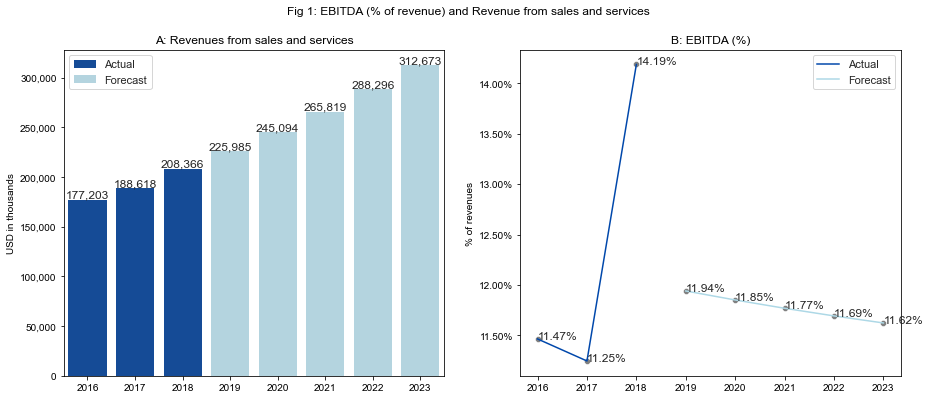

In [9]:
plot_ebitda_revenue_ratio(chart_ttl="Fig 1: EBITDA (% of revenue) and Revenue from sales and services",
                          data=chart_data.ebitda_rev_ratio)

#### 2.2: Unlevered cashflows

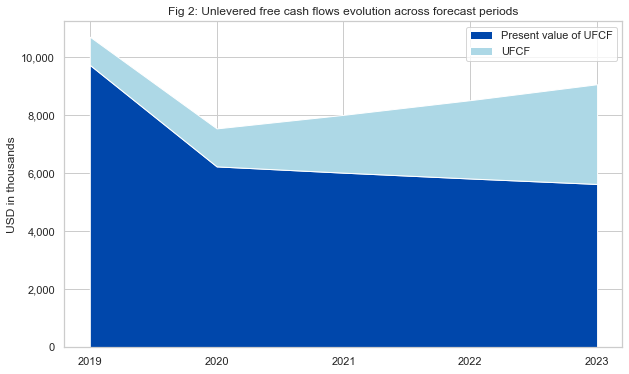

In [10]:
plot_unlevered_cashflows(chart_ttl="Fig 2: Unlevered free cash flows evolution across forecast periods",
                         data=chart_data.ufcf_trend)

#### 2.3: EBITDA components

In [11]:
chart_data.ebitda_components

,Delta EBITDA,Delta revenues,Delta COGS,Delta OPEX,period,year,year-q
2017-12-31,896.618667,10311.000000,-8177.798933,-1236.582400,2017-12-31,2017,2017Q4
2018-12-31,8346.937575,19917.000000,-6950.952025,-4619.110400,2018-12-31,2018,2018Q4
2019-12-31,-2575.767779,17619.015395,-20089.833324,-104.949850,2019-12-31,2019,2019Q4
2020-12-31,2063.224517,19108.844366,-15018.598673,-2027.021176,2020-12-31,2020,2020Q4
2021-12-31,2237.686687,20724.650319,-16288.541568,-2198.422064,2021-12-31,2021,2021Q4
2022-12-31,2426.901032,22477.085615,-17665.868314,-2384.316270,2022-12-31,2022,2022Q4
2023-12-31,2632.114966,24377.703362,-19159.659075,-2585.929321,2023-12-31,2023,2023Q4


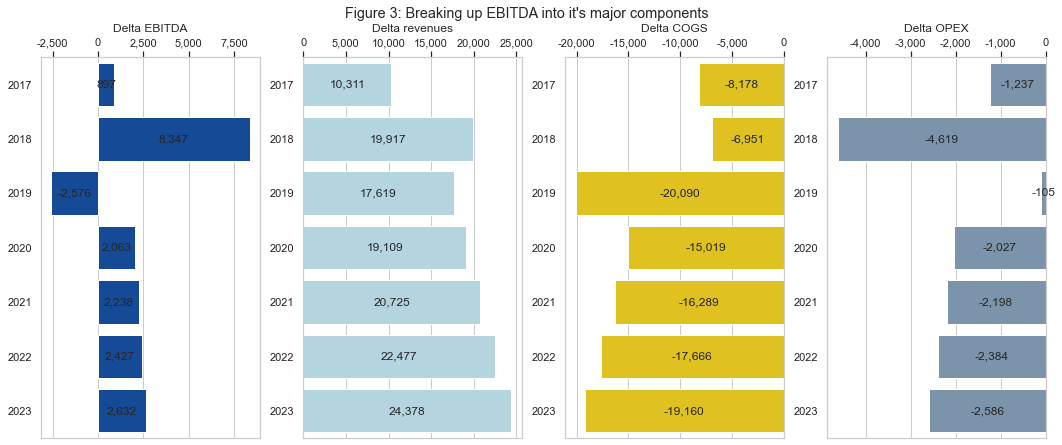

In [12]:
plot_ebitda_component(chart_ttl="Figure 3: Breaking up EBITDA into it's major components",
                      data=chart_data.ebitda_components)

ValueError: Invalid RGBA argument: ['cobalt blue', 'light blue', 'gold']

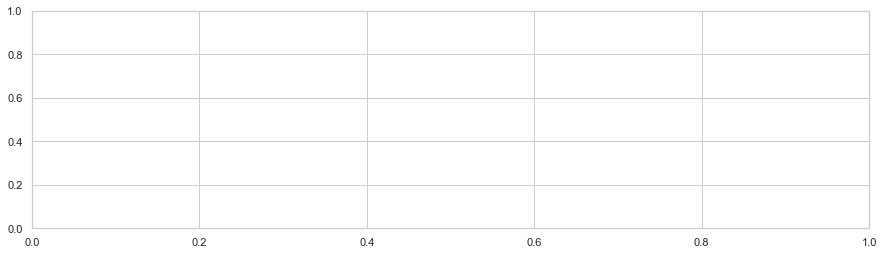

In [18]:
plot_grouped_bars(data=chart_data.days_outstanding_data,chart_ttl="yo")